In [1]:
import networkx as nx
import centrality_utils as cu
import mat73
import nbtw

from matplotlib import pyplot as plt

In [2]:
Data    = mat73.loadmat('mycielskian8.mat')
A       = Data['Problem']['A']

In [3]:
G0      = nx.Graph(A)

In [4]:
CA = cu.CentralityAttributes(A, G0)

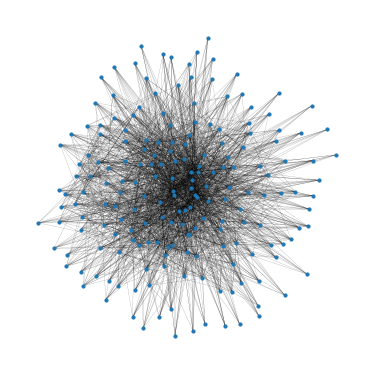

In [5]:
fig0 = plt.figure(figsize=(5,5))
nx.draw(CA.Graph,  node_size=10, width=0.1) #with_labels=True,
plt.savefig("mycielskian_init.jpg", format="jpg", bbox_inches="tight")

In [6]:
KatzNX, alpha_grid = cu.KatzCentralityNX(CA.AdjacencyMatrix, CA.Graph)

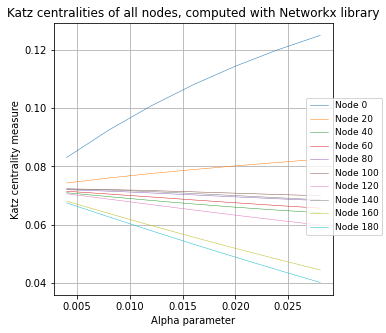

In [7]:
cu.VisualizeNodeCentrality(KatzNX,
                           alpha_grid,
                           "Katz centralities of all nodes, computed with Networkx library",
                           "Alpha parameter",
                           "Katz centrality measure",
                           step=20)

In [8]:
KatzV2, alpha_gridV2 = cu.KatzCentralityV2(CA.AdjacencyMatrix, CA.Graph)

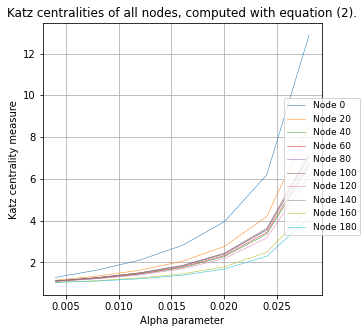

In [9]:
cu.VisualizeNodeCentrality(KatzV2,
                           alpha_gridV2,
                           "Katz centralities of all nodes, computed with equation (2).",
                           "Alpha parameter",
                           "Katz centrality measure",
                           step=20,
                           filename="kat_vs_alph.jpg")

In [10]:
NBTcent, grid_t = cu.NBTCentrality(CA.AdjacencyMatrix)

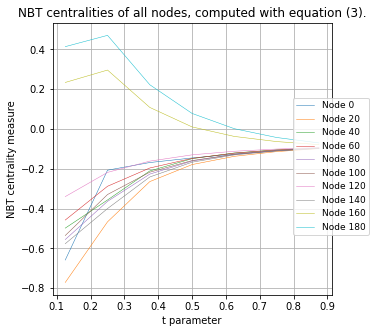

In [11]:
cu.VisualizeNodeCentrality(NBTcent,
                           grid_t,
                           "NBT centralities of all nodes, computed with equation (3).",
                           "t parameter",
                           "NBT centrality measure",
                           step=20,
                           filename="nbt_vs_t.jpg")

In [12]:
KatzV2[140,0]

1.1160887648995839

In [13]:
nbt_walks = nbtw.nbtw(CA.AdjacencyMatrix.toarray(), 12)
"""for i in range(nbt_walks.shape[0]):
    for j in range(nbt_walks.shape[1]):
        print(f"[{i,j}]", nbt_walks[i, j])"""

'for i in range(nbt_walks.shape[0]):\n    for j in range(nbt_walks.shape[1]):\n        print(f"[{i,j}]", nbt_walks[i, j])'

In [14]:
nbt_walks[190,190]

1.2999274776151196e+16

In [15]:
nbt_walks[185,185]

620853484105328.0

In [16]:
nbt_walks[58,58]

2326456791189580.0

In [17]:
#cu.DisplayCentralitiesInGraph(KatzNX, CA.Graph)

TypeError: type numpy.ndarray doesn't define __round__ method

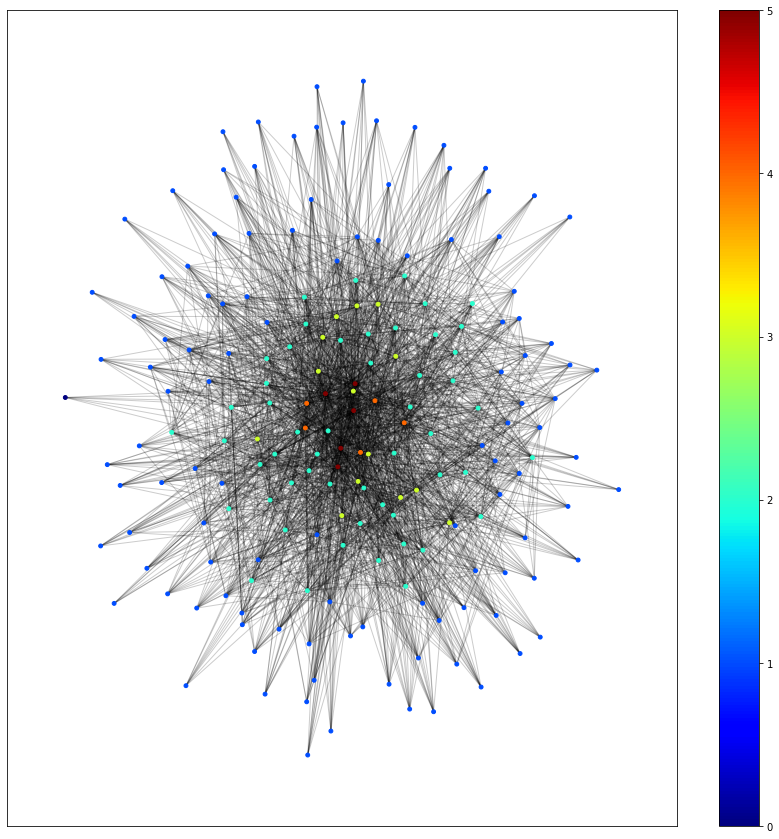

In [18]:
cu.DisplayCentralitiesInGraph(KatzV2, CA.Graph)

In [ ]:
cu.DisplayCentralitiesInGraph(NBTcent, CA.Graph)